# Random opeartions on Image Dataset


In [25]:
# This script applies random operations to all images in an input directory and saves the results in an output directory.
# The images are cropped and resized to 200x200 pixels and then compressed using JPEG at a random quality level.
#
# Usage:
#    python random_operations.py <input directory> <output directory> <seed>
#
# Libraries:
#    pillow=9.0.1
#    jpeg=9e
#    tqdm=4.63.0
#


import os
from PIL import Image
import tqdm
import shutil
import glob
from random import Random

output_size  = 200
cropsize_min = 160
cropsize_max = 2048
cropsize_ratio = (5,8)
qf_range = (65, 100)

def check_img(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp', '.gif'))

def random_operations(input_dir, output_dir, seed, maximg=None):
    print('Random Operations from ', input_dir, 'to', output_dir, flush=True)
    if os.path.isdir(output_dir):
        shutil.rmtree(output_dir)  # remove existing output directory
    os.makedirs(output_dir)  # create output directory
    
    random = Random(seed) # set seed 
    
    # list fo images
    input_dir = input_dir if '*' in input_dir else os.path.join(input_dir, '*')
    list_src = [_ for _ in sorted(glob.glob(input_dir)) if check_img(_)]
    
    if maximg is not None:
        random.shuffle(list_src)  # shuffle the list of images
        list_src = list_src[:maximg]  # limit the number of images
    
    with open(os.path.join(output_dir, 'metainfo.csv'), 'w') as fid:
        fid.write('filename,src,cropsize,x1,y1,qf\n')
        for index, src in enumerate(tqdm.tqdm(list_src)):
            filename_dst = 'img%06d.jpg' % index
            dst = os.path.join(output_dir, filename_dst)
            
            # open image
            img = Image.open(src).convert('RGB')
            height = img.size[1]
            width = img.size[0]

            # select the size of crop
            cropmax = min(min(width, height), cropsize_max)
            if cropmax<cropsize_min:
                print(src, width, height)
            assert cropmax>=cropsize_min
            
            cropmin = max(cropmax*cropsize_ratio[0]//cropsize_ratio[1], cropsize_min)
            cropsize = random.randint(cropmin, cropmax)
            
            # select the type of interpolation
            interp = Image.ANTIALIAS if cropsize>output_size else Image.CUBIC
            
            # select the position of the crop
            x1 = random.randint(0, width - cropsize)
            y1 = random.randint(0, height - cropsize)
            
            # select the jpeg quality factor
            qf = random.randint(*qf_range)
            
            # make cropping
            img = img.crop((x1, y1, x1+cropsize, y1+cropsize))
            assert img.size[0]==cropsize
            assert img.size[1]==cropsize
            
            # make resizing
            img = img.resize((output_size, output_size), interp)
            assert img.size[0]==output_size
            assert img.size[1]==output_size
            
            # make jpeg compression
            img.save(dst, "JPEG", quality = qf)
            
            # save information
            fid.write(f'{filename_dst},{src},{cropsize},{x1},{y1},{qf}\n')
            
            
if __name__=='__main__':
    from sys import argv
    #input_dir  = argv[1]
    #output_dir = argv[2]
    #seed       = int(argv[3])
    #maximg     = int(argv[4]) if len(argv)>4 else None
    random_operations(r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\real', r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\real_preprossed', 17 )
    random_operations(r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\stylegan3', r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\stylegan3_preprossed', 17 )
    

Random Operations from  C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\real to C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\real_preprossed


100%|██████████| 1000/1000 [00:43<00:00, 22.84it/s]

Random Operations from  C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\stylegan3 to C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\stylegan3_preprossed



100%|██████████| 1494/1494 [00:45<00:00, 33.08it/s]


In [1]:
import splitfolders
splitfolders.ratio(  r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data\data_preprossed', output=r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split' , seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 2496 files [00:15, 164.72 files/s]


# Image patch generation 

In [9]:
from utils.python_patch_extractor.PatchExtractor import PatchExtractor
import cv2
import numpy as np
import os

def patch_images_genrate(img_folder_path,patch_img_file):



    image_path_list = [os.path.join(img_folder_path, 'img{:06}.jpg'.format(x)) for x in range(2000)]
    print(image_path_list[0])

    for j,img_ in enumerate(image_path_list):
        img1 = cv2.imread(img_)
        if img1 is None:
            pass
        else:
            
            print(img1.size)
            img2 = cv2.resize(img1, (200, 200))    
            img = np.asarray(img2)
            print("img",img.shape)

                
            stride_0 = ((((img.shape[0] - 64) // 20) + 7) // 8) * 8
            stride_1 = (((img.shape[1] - 64) // 10 + 7) // 8) * 8
            pe = PatchExtractor(dim=(64, 64, 3), stride=(stride_0, stride_1, 3))
            patches = pe.extract(img)
            patch_list = list(patches.reshape((patches.shape[0] * patches.shape[1], 64, 64, 3)))

            for i, patch_img in enumerate(patch_list):
                cv2.imwrite(os.path.join(patch_img_file,'img{:06}_{:06}.jpg'.format(j,i)), patch_img)
    return(None)


In [ ]:
img_folder_path_train_r =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\train\real_preprossed'
patch_img_file_train_r =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_train\real'
img_folder_path_train_s =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\train\stylegan3_preprossed'
patch_img_file_train_s = r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_train\synthatic'

patch_images_genrate(img_folder_path_train_r,patch_img_file_train_r)
patch_images_genrate(img_folder_path_train_s,patch_img_file_train_s)

img_folder_path_val_r =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\val\real_preprossed'
patch_img_file_val_r = r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_val\real'
img_folder_path_val_s =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\val\stylegan3_preprossed'
patch_img_file_val_s = r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_val\synthatic'

patch_images_genrate(img_folder_path_val_r,patch_img_file_val_r)
patch_images_genrate(img_folder_path_val_s,patch_img_file_val_s)

img_folder_path_test_r =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\test\real_preprossed'
patch_img_file_test_r = r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_test\real'
img_folder_path_test_s =r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\test\stylegan3_preprossed'
patch_img_file_test_s = r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_test\synthatic'

patch_images_genrate(img_folder_path_test_r,patch_img_file_test_r)
patch_images_genrate(img_folder_path_test_s,patch_img_file_test_s )

# Data Augmentation and Normalization

In [ ]:
import os
import torch
import tarfile
import torchvision
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets.utils import download_url
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint



transform_train = transforms.Compose([
    
    transforms.Resize((64,64)), #becasue vgg takes 150*150
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])

#Augmentation is not done for test/validation data.
transform_test = transforms.Compose([
    
    transforms.Resize((64,64)), #becasue vgg takes 150*150
    transforms.ToTensor(),
    transforms.Normalize((.5, .5, .5), (.5, .5, .5))
    
])


train_ds = ImageFolder(r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_train', transform=transform_train)
test_ds = ImageFolder(r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_val', transform=transform_test)
#pred_ds = ImageFolder(r'pred path', transform=transform_test)


len(train_ds),len(test_ds) #len(pred_ds)
image,label  = train_ds[0]
print(label)
print(image.shape, label)

batch_size=128
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(test_ds, batch_size, num_workers=4, pin_memory=True)
#pred_dl = DataLoader(pred_ds, batch_size, num_workers=4, pin_memory=True)
train_dl2 = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)

for images, _ in train_dl2:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break


# Model Building and Training 

0
torch.Size([3, 64, 64]) 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3, 64, 64])
classes ['real', 'synthatic']
Epoch [0], train_loss: 0.5867, val_loss: 0.5582, val_acc: 0.6759
Epoch [1], train_loss: 0.5492, val_loss: 0.5424, val_acc: 0.6888
Epoch [2], train_loss: 0.5335, val_loss: 0.5332, val_acc: 0.6960
Epoch [3], train_loss: 0.5228, val_loss: 0.5310, val_acc: 0.6973
Epoch [4], train_loss: 0.5130, val_loss: 0.5298, val_acc: 0.6979
Epoch [5], train_loss: 0.5040, val_loss: 0.5276, val_acc: 0.7012
Epoch [6], train_loss: 0.4974, val_loss: 0.5280, val_acc: 0.7029
Epoch [7], train_loss: 0.4906, val_loss: 0.5290, val_acc: 0.7026
Epoch [8], train_loss: 0.4822, val_loss: 0.5304, val_acc: 0.7054
Epoch [9], train_loss: 0.4757, val_loss: 0.5351, val_acc: 0.7009
Epoch [0], train_loss: 0.4696, val_loss: 0.5299, val_acc: 0.7036
Epoch [1], train_loss: 0.4674, val_loss: 0.5317, val_acc: 0.7038
Epoch [2], train_loss: 0.4664, val_loss: 0.5326, val_acc: 0.7034
Epoch [3], train_loss: 0.4656, val_loss: 0.5304, val_acc: 0.7051
Epoch [4], train_

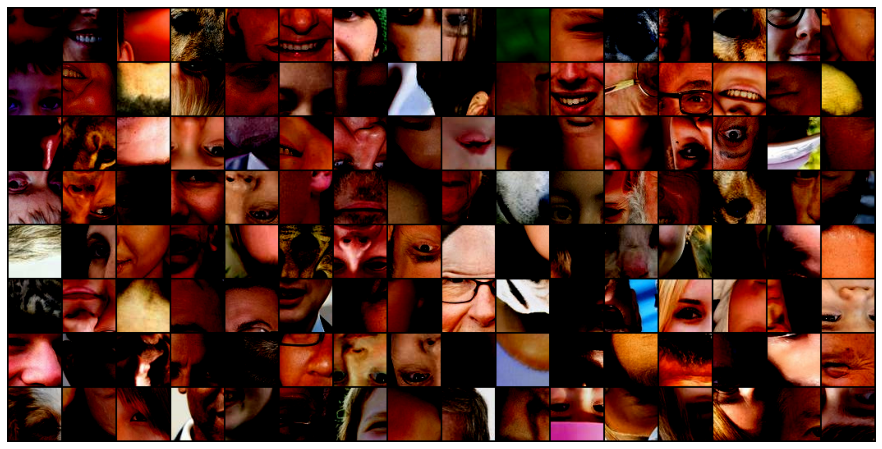

In [12]:

import pathlib
root = pathlib.Path(r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\patch_data\patch_train')
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])
print("classes",classes)

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

from torchvision import models 
modelresnet50 = models.resnet50(pretrained = True)

for q in modelresnet50.parameters() :
    q.requires_grad = False

checkpoint_callback = ModelCheckpoint(dirpath='check_weight')
modelresnet50.fc = nn.Sequential(
  nn.Linear(in_features=2048, out_features=1024) ,
  nn.ReLU(),
  nn.Linear(in_features=1024, out_features=512) ,
  nn.ReLU(),
  nn.Dropout(p=0.6), 
  nn.Linear(in_features=512 , out_features=2),
  
)

modelresnet50

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))


class IntelCnnModelresnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = modelresnet50
        
    def forward(self, xb):
        return self.network(xb)


model = model2 = IntelCnnModelresnet()

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)


class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

device = get_default_device()
device

train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
#pred_dl = DeviceDataLoader(pred_dl, device)
to_device(model, device)


@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()   #eval() is called to tell model that now it is validation mode and so don't perform stuff like dropout,backpropagation etc..
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 

        #load check point 

        model.train() #eval() is called to tell model that now it is training mode and so  perform stuff like dropout,backpropagation etc..
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history


model = to_device(model, device)
evaluate(model, val_dl)

num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.00001
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

num_epochs = 5
opt_func = torch.optim.Adam
lr = 0.000001
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

val = evaluate(model, val_dl)

val


torch.save(model, 'mosel_stgan3.pth')



# Model prediction

In [96]:
from utils.python_patch_extractor.PatchExtractor import PatchExtractor
import cv2
import numpy as np
import os

def predict_single(input,label, model):
    img_net_scores=[]
    img =input
    stride_0 = ((((img.shape[0] - 64) // 20) + 7) // 8) * 8
    stride_1 = (((img.shape[1] - 64) // 10 + 7) // 8) * 8
    pe = PatchExtractor(dim=(64, 64, 3), stride=(stride_0, stride_1, 3))
    patches = pe.extract(img)
    patch_list = list(patches.reshape((patches.shape[0] * patches.shape[1], 64, 64, 3)))

    transf_patch_list = [ transform_test(Image.fromarray(patch)) for patch in patch_list]
    transf_patch_tensor = torch.stack(transf_patch_list, dim=0)

    

    input = to_device(transf_patch_tensor,device)

    predictions = model(input)

    patch_scores = model(input).cpu().detach().numpy()
   
    patch_predictions = np.argmax(patch_scores, axis=1)
  

    maj_voting = np.any(patch_predictions).astype(int)
    scores_maj_voting = patch_scores[:, maj_voting]
    img_net_scores.append(np.mean(scores_maj_voting) if maj_voting == 1 else -np.mean(scores_maj_voting))
    img_score = np.mean(img_net_scores)
    print(img_score)



 

In [97]:
pred_ds = ImageFolder(r'C:\Users\heeth\Desktop\GAN-image-detection-main\GAN-image-detection-main\data_split\test\prediction_test')

predict_single(np.array(pred_ds[0][0]),0, model)



1.7378912
